# Motivation



Start by importing the required packages:

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# the new code is in the rdFingerprintGenerator module:
from rdkit.Chem import rdFingerprintGenerator

In [8]:
# from: https://github.com/ljmartin/snippets/blob/master/atom_typing_snippet.ipynb
from collections import OrderedDict

##Using 'fake' atomic numbers 40 - 44 to correspond to D,A,P,N,L

PPP = OrderedDict({"D":(['[OH]','[#7H,#7H2]'], 40),
      "A":(['[OH0]','[#7H0]'], 41), # <- modified by gl
      'P':(['[*+]','[#7H2]'], 42),
      'N':(['[*-]','[C&$(C(=O)O)]','[P&$(P(=O)O)]','[S&$(S(=O)O)]'], 43),
      "L":(['[Cl,Br,I]','[S;D2;$(S(C)(C))]'], 44)})
##This sets the "L" type

def ContructLFromGraphSearch(mol):
    AtomIndex = []
    for atom in mol.GetAtoms():
        temp = []
        if atom.GetAtomicNum() == 6:
            for neighatom in atom.GetNeighbors():
                if neighatom.GetAtomicNum() == 6:
                    temp.append(0)
                elif neighatom.GetAtomicNum() == 1:
                    continue
                else:
                    temp.append(1)
            if sum(temp) == 0:
                AtomIndex.append(atom.GetIdx())

    return AtomIndex

##This sets the DAPN types. 
def AssignAtomTypes(mol):
    res = [0]*mol.GetNumAtoms()
    for ppptype in PPP:
        smarts,idx = PPP[ppptype]
        for sma in smarts:
            patt = Chem.MolFromSmarts(sma)
            for k in mol.GetSubstructMatches(patt):
                res[k[0]] = idx
    for atomIdx in ContructLFromGraphSearch(mol):
        res[atomIdx] = 44
    return res

def oAssignAtomType(mol):
    res = dict()
    for ppptype in PPP:
        temp = []
        for i in PPP[ppptype][0]:
            patt = Chem.MolFromSmarts(i)
            atomindex = mol.GetSubstructMatches(patt)
            atomindex = [k[0] for k in atomindex]
            temp.extend(atomindex)
            for atom in atomindex:
                mol.GetAtomWithIdx(atom).SetAtomicNum(PPP[ppptype][1])
        res.update({ppptype:temp})
    temp = ContructLFromGraphSearch(mol)
    temp.extend(res['L'])
    res.update({'L':temp})
    for idx in res['L']:
        mol.GetAtomWithIdx(idx).SetAtomicNum(44)
        
    print(res)
    return mol

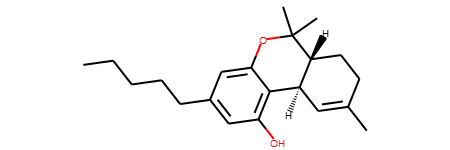

In [9]:
thc = 'CCCCCc1cc(c2c(c1)OC([C@H]3[C@H]2C=C(CC3)C)(C)C)O'

thc_mol = Chem.MolFromSmiles(thc)

thc_mol

In [10]:
AssignAtomTypes(thc_mol)

[44,
 44,
 44,
 44,
 44,
 44,
 44,
 0,
 44,
 0,
 44,
 41,
 0,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 40]

In [7]:
oAssignAtomType(thc_mol);

{'D': [22], 'A': [11], 'P': [], 'N': [], 'L': [0, 1, 2, 3, 4, 5, 6, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21]}
